# Exercícios programa - Regressão linear

Implemente o algoritmo gradiente descendente para regressão
linear com múltiplas variáveis e aplique seu algoritmo com os
conjuntos de dados: **dados1.csv**, **dados2.csv** e **dados3.csv**.

## Carregando bibliotecas principais

Carregando bibliotecas de uso geral, como: **numpy**, **pandas**, **matplotlib**...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from IPython.display import HTML

## Carregando conjuntos de dados

Carregando conjuntos **dados1.csv**, **dados2.csv** e **dados3.csv**.

In [5]:
# carregando arquivos de dados
dfdados1 = pd.read_csv('./dados1.csv', sep=',', header=None)
dfdados2 = pd.read_csv('./dados2.csv', sep=',', header=None)
dfdados3 = pd.read_csv('./dados3.csv', sep=',', header=None)

# conjunto 1
Xdados1 = dfdados1.values[:, 0:-1]
Ydados1 = dfdados1.values[:, -1]
mdados1 = np.size(Xdados1, 0)
ndados1 = np.size(Xdados1, 1)

# conjunto 2
Xdados2 = dfdados2.values[:, 0:-1]
Ydados2 = dfdados2.values[:, -1]
mdados2 = np.size(Xdados2, 0)
ndados2 = np.size(Xdados2, 1)

# conjunto 3
Xdados3 = dfdados3.values[:, 0:-1]
Ydados3 = dfdados3.values[:, -1]
mdados3 = np.size(Xdados3, 0)
ndados3 = np.size(Xdados3, 1)

# adicionando o bias nos conjuntos
Xdados1 = np.c_[ np.ones(mdados1), Xdados1 ] 
Xdados2 = np.c_[ np.ones(mdados2), Xdados2 ] 
Xdados3 = np.c_[ np.ones(mdados3), Xdados3 ] 

## Exercicíos: Implemente as seguintes funções

### 1. Implementar a função normalização (z-scores).
$$
X'^{(i)}_{j} = \frac{X^{i}_j - \mu(X_{j})}{\sigma(X_j)}
$$

In [6]:
def zscores(X, mean=None, std=None, bias=False):    
    
    #adicione sua implementação
    if bias == True:
        init = 1
    else:
        init = 0        
    if mean is None:
        mean = np.mean(X[:, init:], axis=0) 
    if std is None:
        std = np.std(X[:, init:], axis=0) 
    X[:, init:]=(X[:, init:]-mean)/(std)
    
    return (X, mean, std)


# Testando sua função zsocre
Xdados2T = np.copy(Xdados2)
Xdados2T, mean_, std_ = zscores(Xdados2T, bias=True)
print(Xdados2T[0:3, 1:])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]]


### 2. Implementar a função de custo.
 - Hipótese 
$$h_{\theta}(x) = \theta^{T} x = \sum_{i=1}^{n}\theta_i x_i$$
 - Custo
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}( h_\theta(x^{(i)}) - y^{(i)} )^2$$

In [7]:
# hipótese (já vetorizada)
# note que, X deve ter dimensão m x (n+1) e thetas dimensão (n+1) x 1
def hipotese(X, thetas):
    return X.dot(thetas)

# função de custo
def funcaoCusto(X, Y, m, thetas):
    custo = 0
    #adicione sua implementação
    h = hipotese(X, thetas)
    custo = (h-Y).T.dot(h-Y) / (2*m)
    
    return custo

Seja $ X_{\text{dados1}} $ normalizado pelo método $\text{zscores}$. Considere $ \theta=[1.0647, 0.1106] $, assim temos que: $ \text{funcaoCusto}(X_{\text{dados1}}, Y_{\text{dados1}}, \theta)=0.000983 $.

In [8]:
# Testando sua função custo
Xdados1T = np.copy(Xdados1)
Xdados1T, mean_, std_ = zscores(Xdados1T, bias=True)
thetasTeste = np.array([1.0647, 0.1106])
c = funcaoCusto(Xdados1T, Ydados1, mdados1, thetasTeste)
print("Custo = "+format(c))

Custo = 0.0009836391913337363


### 3. Implementar a função derivada da função de custo.
 - Derivada
$$\partial J(\theta) = \frac{1}{m}\sum_{i=1}^{m}( h_\theta(x^{(i)}) - y^{(i)} ) x^{(i)}_j$$

In [9]:
# derivada da função de custo
def derivadaDaFuncaoCusto(X, Y, m, thetas):
    derivada = 0   
    #adicione sua implementação
    h = hipotese(X, thetas)    
    derivada = (h-Y).dot(X)/m

    return derivada

Seja $ X_{\text{dados1}} $ normalizado pelo método $\text{zscores}$. Considere $ \theta=[0.827225, 0.085157] $, assim temos que: $ \text{derivadaDaFuncaoCusto}(X_{\text{dados1}}, Y_{\text{dados1}}, \theta)=[-0.2375, -0.0249] $.

In [10]:
Xdados1T = np.copy(Xdados1)
Xdados1T, mean_, std_ = zscores(Xdados1T, bias=True)
thetasTeste = np.array([0.827225, 0.085157])
d = derivadaDaFuncaoCusto(Xdados1T, Ydados1, mdados1, thetasTeste)
print("Derivada = "+format(d))

Derivada = [-0.237455   -0.02430041]


### 4. Implementar a função predição.

In [11]:
# predição
def predicao(X, thetas):
    pred = 0
    #adicione sua implementação
    pred = hipotese(X, thetas)
    
    return pred

Seja $ x=[1, 3.5] $. Considere $ \theta=[0.827225, 0.085157] $, assim temos que: $ \text{predicao}(x, \theta)=1.1252745 $.

In [15]:
thetasTeste = np.array([0.827225, 0.085157])
x = np.array([1, 3.5])
p = predicao(x, thetasTeste)
print("Predição = " + format(p))

Predição = 1.1252745


## Gradiente descendente

In [16]:
# gradiente descendente
def gradienteDescendente(X, Y, m, numEpocas, alpha):
    n = np.size(X, 1)    
    thetas = np.random.rand(n)
    J_historico = []
    
    for iteracao in range(numEpocas):        
        thetas = thetas - alpha * derivadaDaFuncaoCusto(X, Y, m, thetas)
        J_historico = J_historico + [funcaoCusto(X, Y, m, thetas)]
    
    return [thetas, J_historico]

In [17]:
# outras funções úteis para as tabelas
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

def multi_table(table_list):
    return HTML(
        '<table style="margin: 0 auto;"><tr style="vertical-align:top;background-color:white;">' + 
        ''.join(['<td style="vertical-align:top;">' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

styles = [
    hover(),
    dict(selector="td", props=[("font-size", "120%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "120%"),
                               ("text-align", "left")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]

# Resultados

## - Resultados para o conjunto **dados1.csv**.

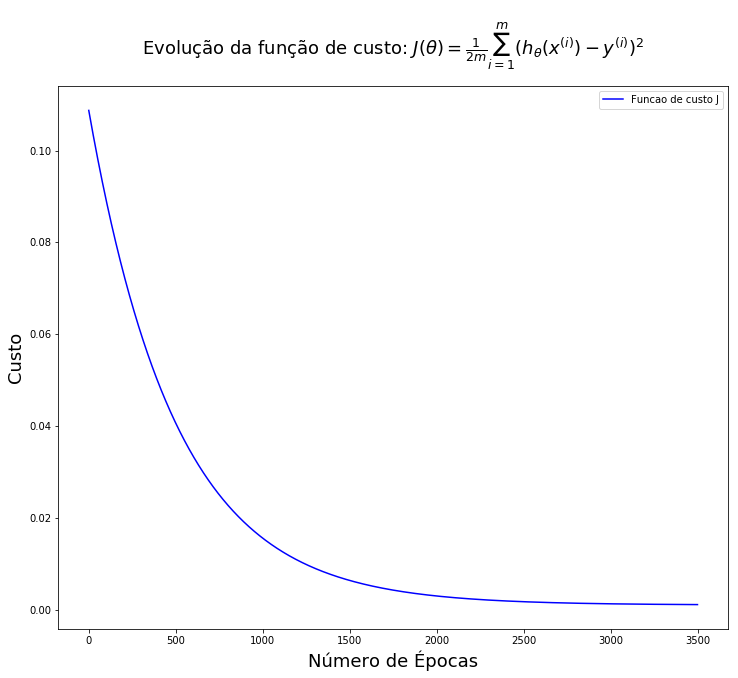

In [18]:
""" Normalizando os dados via zscores """
# observação: não normalizar o bias
Xdados1, mean_, std_ = zscores(Xdados1, bias=True)

""" Escolhendo parâmetros """
alpha = 0.001
numEpocas = 3500
(thetas, J_historico) = gradienteDescendente(Xdados1, Ydados1, mdados1, numEpocas, alpha)
MSE1 = J_historico[-1]

""" Valor de custo acumulado """
plt.figure(figsize=(12,10))
plt.plot(range(numEpocas), J_historico, color='blue', label='Funcao de custo J')
plt.xlabel(r'Número de Épocas', fontsize=18)
plt.ylabel(r'Custo', fontsize=18)
plt.title(r'Evolução da função de custo: $J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$'+'\n', 
          fontsize=18)
plt.legend()
HTML(plt.show())

""" Tabelas """
identifiers = range(np.size(thetas))
tablethetas = pd.DataFrame({r'Vetor $\theta$': np.char.mod(r'$\theta_{%d}$', identifiers),
                            'Valor do parâmetro':thetas})

tablethetas = tablethetas[[r'Vetor $\theta$', 'Valor do parâmetro']]
tablethetas = (tablethetas.style.set_table_styles(styles).set_caption("Passe o mouse."))

tableparams = pd.DataFrame({'Valores':[numEpocas,
                                       alpha,
                                      MSE1]}, 
                           index=['Número de épocas', 
                                  'Taxa de aprendizagem',
                                 'MSE:'])

tableparams = (tableparams.style.set_table_styles(styles).set_caption("Passe o mouse."))
multi_table([tablethetas, tableparams])

## - Resultados para o conjunto **dados2.csv**.

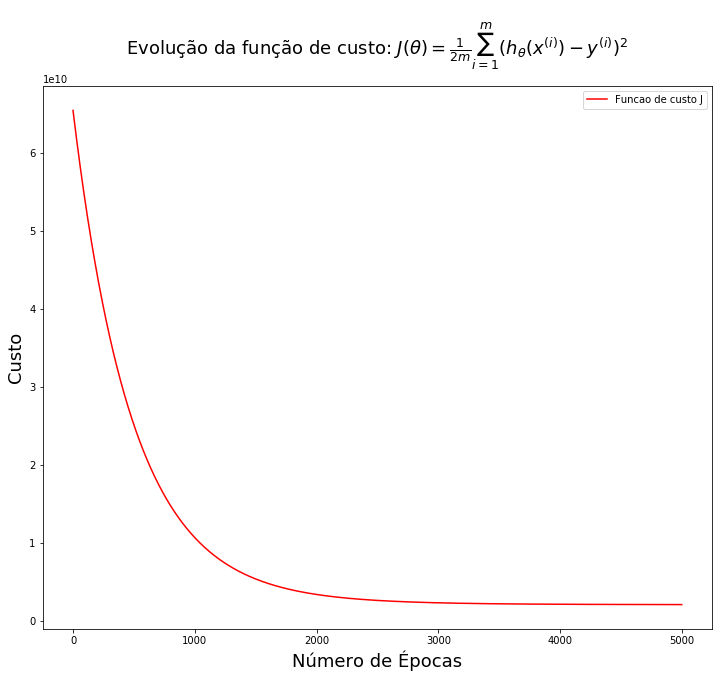

In [19]:
""" Normalizando os dados via zscores """
# observação: não normalizar o bias
Xdados2, mean_, std_ = zscores(Xdados2, bias=True)

""" Escolhendo parâmetros """
alpha = 0.001
numEpocas = 5000
(thetas, J_historico) = gradienteDescendente(Xdados2, Ydados2, mdados2, numEpocas, alpha)
MSE2 = J_historico[-1]

""" Valor de custo acumulado """
plt.figure(figsize=(12,10))
plt.plot(range(numEpocas), J_historico, color='red', label='Funcao de custo J')
plt.xlabel(r'Número de Épocas', fontsize=18)
plt.ylabel(r'Custo', fontsize=18)
plt.title(r'Evolução da função de custo: $J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$'+'\n', 
          fontsize=18)
plt.legend()
HTML(plt.show())

""" Tabelas """
identifiers = range(np.size(thetas))
tablethetas = pd.DataFrame({r'Vetor $\theta$': np.char.mod(r'$\theta_{%d}$', identifiers),
                            'Valor do parâmetro':thetas})

tablethetas = tablethetas[[r'Vetor $\theta$', 'Valor do parâmetro']]
tablethetas = (tablethetas.style.set_table_styles(styles).set_caption("Passe o mouse."))

tableparams = pd.DataFrame({'Valores':[numEpocas,
                                       alpha,
                                      str(MSE2)]}, 
                           index=['Número de épocas', 
                                  'Taxa de aprendizagem',
                                 'MSE:'])

tableparams = (tableparams.style.set_table_styles(styles).set_caption("Passe o mouse."))
multi_table([tablethetas, tableparams])

## - Resultados para o conjunto **dados3.csv**.

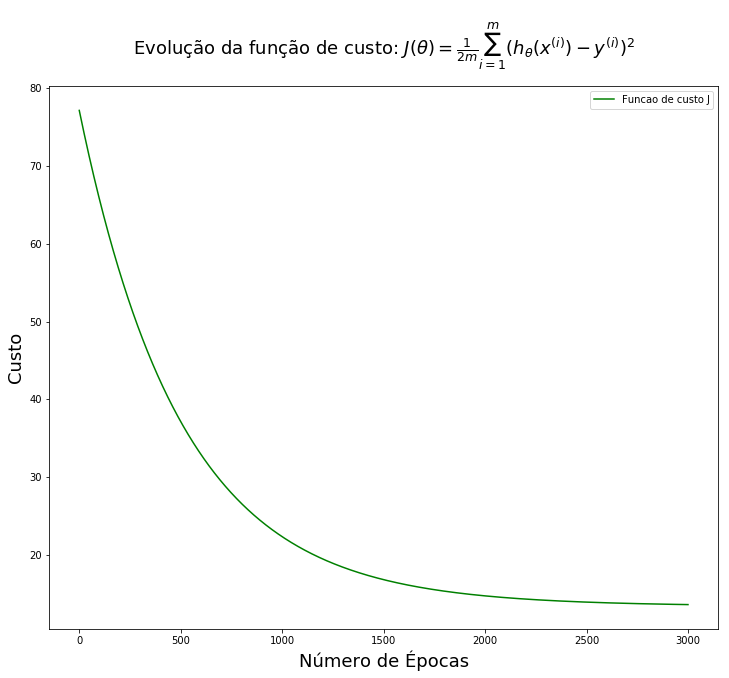

In [20]:
""" Normalizando os dados via zscores """
# observação: não normalizar o bias
Xdados3, mean_, std_ = zscores(Xdados3, bias=True)

""" Escolhendo parâmetros """
alpha = 0.001
numEpocas = 3000
(thetas, J_historico) = gradienteDescendente(Xdados3, Ydados3, mdados3, numEpocas, alpha)
MSE3 = J_historico[-1]

""" Valor de custo acumulado """
plt.figure(figsize=(12,10))
plt.plot(range(numEpocas), J_historico, color='green', label='Funcao de custo J')
plt.xlabel(r'Número de Épocas', fontsize=18)
plt.ylabel(r'Custo', fontsize=18)
plt.title(r'Evolução da função de custo: $J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$'+'\n', 
          fontsize=18)
plt.legend()
HTML(plt.show())

""" Tabelas """
identifiers = range(np.size(thetas))
tablethetas = pd.DataFrame({r'Vetor $\theta$': np.char.mod(r'$\theta_{%d}$', identifiers),
                            'Valor do parâmetro':thetas})

tablethetas = tablethetas[[r'Vetor $\theta$', 'Valor do parâmetro']]
tablethetas = (tablethetas.style.set_table_styles(styles).set_caption("Passe o mouse."))


tableparams = pd.DataFrame({'Valores':[numEpocas,
                                       alpha,
                                      MSE3]}, 
                           index=['Número de épocas', 
                                  'Taxa de aprendizagem',
                                 'MSE:'])

tableparams = (tableparams.style.set_table_styles(styles).set_caption("Passe o mouse."))
multi_table([tablethetas, tableparams])